# S&P 500 Stock Market - Time series Analysis


In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
from warnings import filterwarnings
filterwarnings('ignore')

### ETL Pipeline (Extract Transform and Load)

In [2]:
# Collecting various Stock data

import glob
glob.glob(r'C:\Users\olayi\Downloads\S&P_resources\individual_stocks_5yr\*csv')

['C:\\Users\\olayi\\Downloads\\S&P_resources\\individual_stocks_5yr\\AAL_data.csv',
 'C:\\Users\\olayi\\Downloads\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\olayi\\Downloads\\S&P_resources\\individual_stocks_5yr\\AAP_data.csv',
 'C:\\Users\\olayi\\Downloads\\S&P_resources\\individual_stocks_5yr\\ABBV_data.csv',
 'C:\\Users\\olayi\\Downloads\\S&P_resources\\individual_stocks_5yr\\ABC_data.csv',
 'C:\\Users\\olayi\\Downloads\\S&P_resources\\individual_stocks_5yr\\ABT_data.csv',
 'C:\\Users\\olayi\\Downloads\\S&P_resources\\individual_stocks_5yr\\ACN_data.csv',
 'C:\\Users\\olayi\\Downloads\\S&P_resources\\individual_stocks_5yr\\ADBE_data.csv',
 'C:\\Users\\olayi\\Downloads\\S&P_resources\\individual_stocks_5yr\\ADI_data.csv',
 'C:\\Users\\olayi\\Downloads\\S&P_resources\\individual_stocks_5yr\\ADM_data.csv',
 'C:\\Users\\olayi\\Downloads\\S&P_resources\\individual_stocks_5yr\\ADP_data.csv',
 'C:\\Users\\olayi\\Downloads\\S&P_resources\\individual_stocks_5yr\\ADSK

In [3]:
# We will be working on four companies; Apple, Amazon, Google, and Microsoft
company_list = [
    'C:\\Users\\olayi\\Downloads\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv',
    'C:\\Users\\olayi\\Downloads\\S&P_resources\\individual_stocks_5yr\\AMZN_data.csv',
    'C:\\Users\\olayi\\Downloads\\S&P_resources\\individual_stocks_5yr\\GOOG_data.csv', 
    'C:\\Users\\olayi\\Downloads\\S&P_resources\\individual_stocks_5yr\\MSFT_data.csv'
]

In [4]:
# combine the csv files into a full dataframe
all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(file)
    all_data = all_data.append(current_df, ignore_index = True)


In [5]:
all_data


date     open     high      low    close     volume  Name
0     2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1     2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2     2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3     2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4     2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL
...          ...      ...      ...      ...      ...        ...   ...
4747  2018-02-01  94.7900  96.0700  93.5813  94.2600   47227882  MSFT
4748  2018-02-02  93.6400  93.9700  91.5000  91.7800   47867753  MSFT
4749  2018-02-05  90.5600  93.2400  88.0000  88.0000   51031465  MSFT
4750  2018-02-06  86.8900  91.4750  85.2500  91.3300   67998564  MSFT
4751  2018-02-07  90.4900  91.7700  89.2000  89.6100   41107592  MSFT

[4752 rows x 7 columns]

In [6]:
# To check our unique company lists
all_data['Name'].unique()

array(['AAPL', 'AMZN', 'GOOG', 'MSFT'], dtype=object)

In [7]:
# Understanding the data
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4752 entries, 0 to 4751
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    4752 non-null   object 
 1   open    4752 non-null   float64
 2   high    4752 non-null   float64
 3   low     4752 non-null   float64
 4   close   4752 non-null   float64
 5   volume  4752 non-null   int64  
 6   Name    4752 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 260.0+ KB


In [8]:
# Checking the statistical analyis summary
all_data.describe()

open         high          low        close        volume
count  4752.000000  4752.000000  4752.000000  4752.000000  4.752000e+03
mean    344.075960   346.906095   340.992481   344.100091  2.465232e+07
std     329.660871   332.181676   326.876297   329.705792  2.956724e+07
min      27.350000    27.600000    27.230000    27.370000  7.932000e+03
25%      67.031000    67.668125    66.528900    66.836000  2.562696e+06
50%     153.740000   154.260000   152.685000   153.470000  1.796529e+07
75%     587.527500   592.625000   582.050000   587.092500  3.601633e+07
max    1477.390000  1498.000000  1450.040000  1450.890000  2.668336e+08

In [9]:
# Checking for missing values
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [10]:
# Checking the data types and transforming some columns to the correct data types

all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [11]:
# the date column is the string data type which is a wrong data type. It has to be change to a datetime data type
all_data['date'] = pd.to_datetime(all_data['date'])
all_data['date']

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
4747   2018-02-01
4748   2018-02-02
4749   2018-02-05
4750   2018-02-06
4751   2018-02-07
Name: date, Length: 4752, dtype: datetime64[ns]

### Exploratory Data Analysis

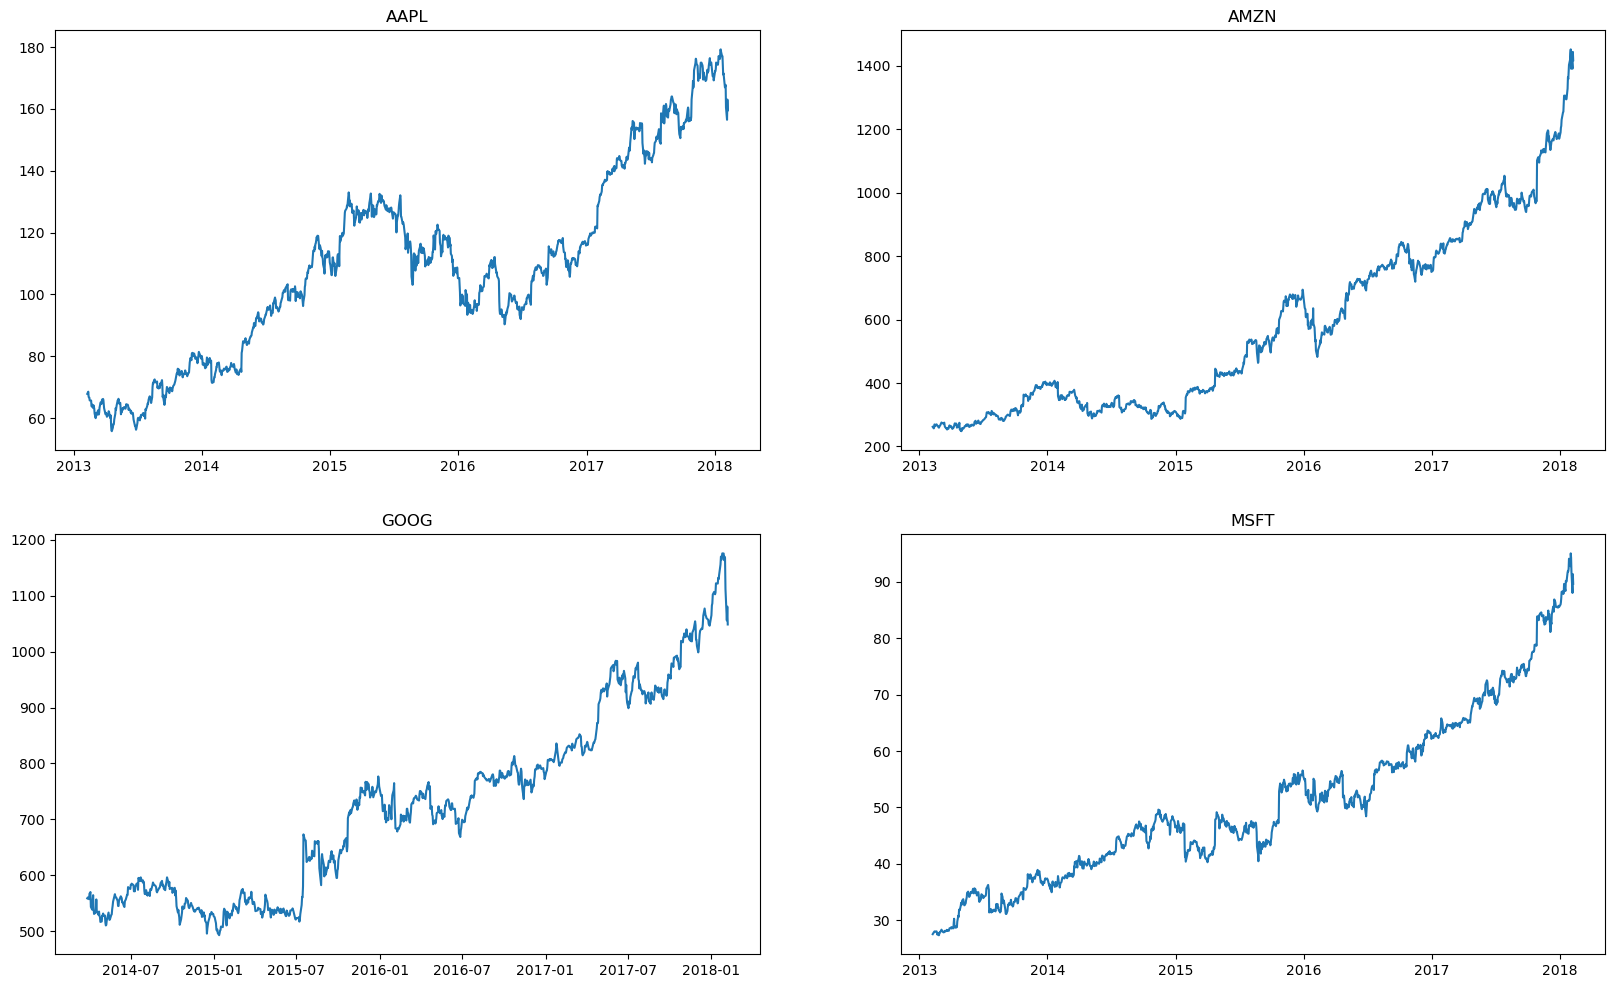

In [12]:
# Analysing the change in price of stock overtime
# show a plot of each company's closing price against time

company_name = all_data['Name'].unique()
plt.figure(figsize = (20,12))

for index, company in enumerate(company_name, 1):
    plt.subplot(2, 2, index)
    filter = all_data['Name'] == company
    df = all_data[filter]
    plt.plot(df['date'], df['close'])
    plt.title(company)

In [13]:
# Analysisng moving average of various stocks
# Simply put, Moving average is a statistic of the average change in price of over a specific window or period
new_data = all_data.copy()


In [14]:
ma_day = [10, 20,50]

for ma in ma_day:
    new_data['close_'+str(ma)] = new_data['close'].rolling(ma).mean()
    

In [15]:
new_data

date     open     high      low    close     volume  Name  \
0    2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1    2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2    2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3    2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4    2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   
...         ...      ...      ...      ...      ...        ...   ...   
4747 2018-02-01  94.7900  96.0700  93.5813  94.2600   47227882  MSFT   
4748 2018-02-02  93.6400  93.9700  91.5000  91.7800   47867753  MSFT   
4749 2018-02-05  90.5600  93.2400  88.0000  88.0000   51031465  MSFT   
4750 2018-02-06  86.8900  91.4750  85.2500  91.3300   67998564  MSFT   
4751 2018-02-07  90.4900  91.7700  89.2000  89.6100   41107592  MSFT   

      close_10  close_20  close_50  
0          NaN       NaN       NaN  
1          NaN       NaN       NaN  
2          NaN       NaN       NaN  
3          NaN       NaN       NaN  
4          NaN       NaN       NaN  
...        ...       ...       ...  
4747    92.765   90.6770   86.9978  
4748    92.943   90.9105   87.1828  
4749    92.582   90.9010   87.2684  
4750    92.525   91.0535   87.4328  
4751    92.304   91.1230   87.5598  

[4752 rows x 10 columns]

In [16]:
 new_data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_20', 'close_50'],
      dtype='object')

In [17]:
new_data.set_index('date', inplace = True)

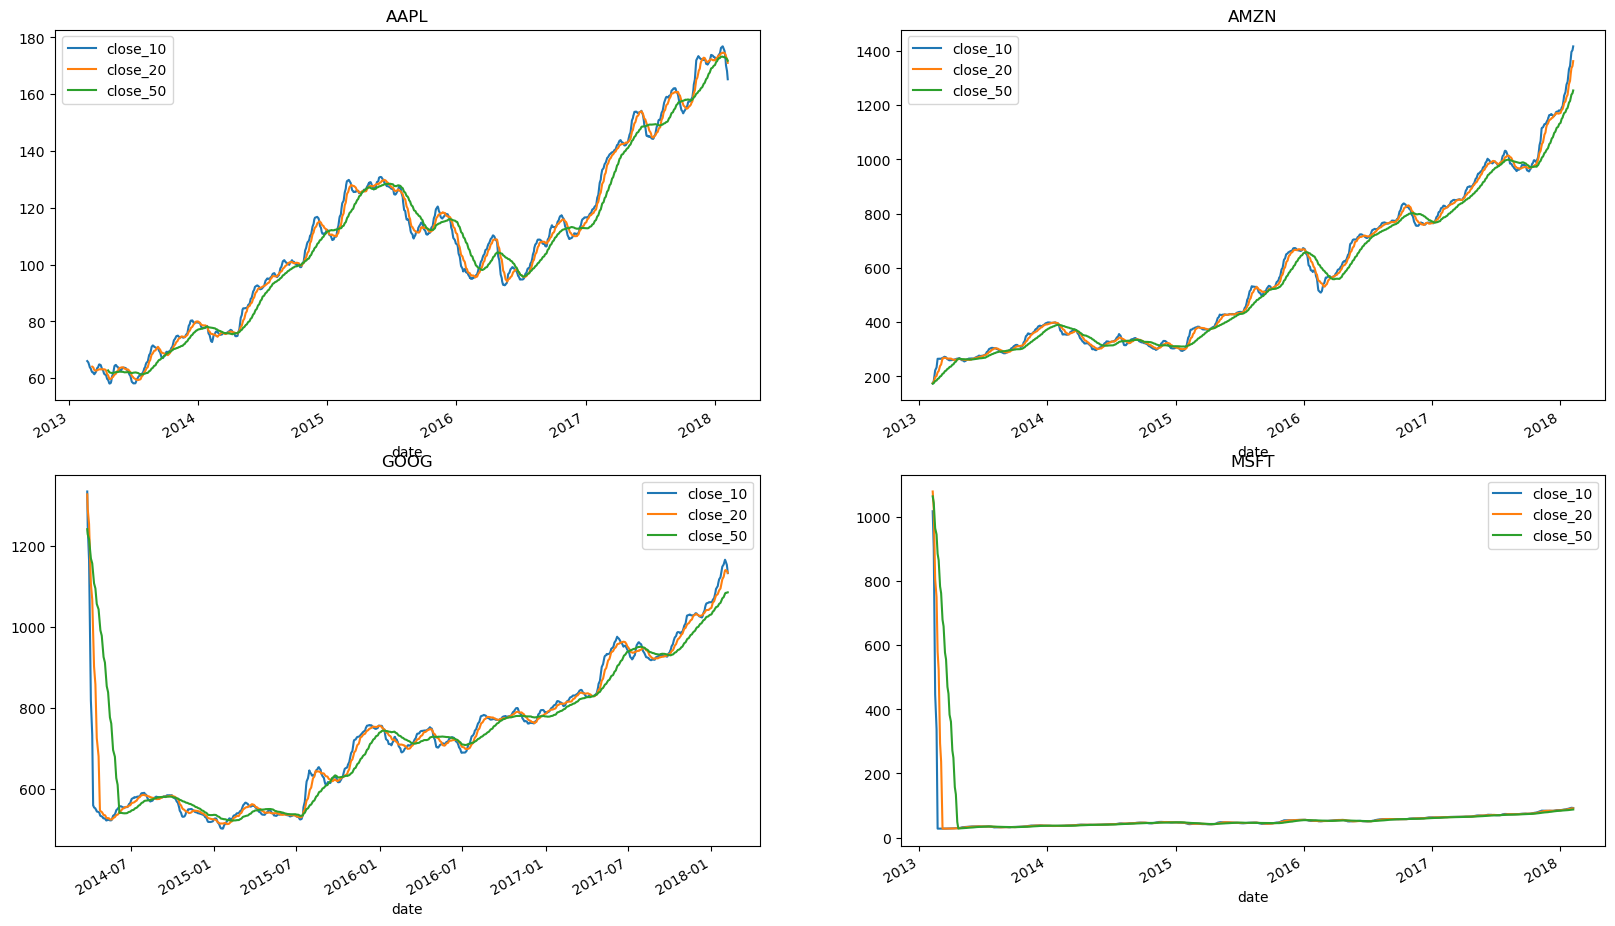

In [18]:
plt.figure(figsize = (20,12))

for index, company in enumerate(company_name, 1):
    plt.subplot(2, 2, index)
    filter = new_data['Name'] == company
    df = new_data[filter]
    df[['close_10', 'close_20', 'close_50']].plot(ax = plt.gca())
    plt.title(company)

In [19]:
# Observing Closing price change in apple stock
company_list

['C:\\Users\\olayi\\Downloads\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\olayi\\Downloads\\S&P_resources\\individual_stocks_5yr\\AMZN_data.csv',
 'C:\\Users\\olayi\\Downloads\\S&P_resources\\individual_stocks_5yr\\GOOG_data.csv',
 'C:\\Users\\olayi\\Downloads\\S&P_resources\\individual_stocks_5yr\\MSFT_data.csv']

In [20]:
Apple_df = pd.read_csv(r'C:\\Users\\olayi\\Downloads\\S&P_resources\\individual_stocks_5yr\\AAPL_data.csv')
Apple_df.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [21]:
Apple_df['daily return (in %)'] = Apple_df['close'].pct_change()*100

In [22]:
Apple_df.head()

date     open     high      low    close     volume  Name  \
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

   daily return (in %)  
0                  NaN  
1             1.042235  
2            -2.506658  
3            -0.190297  
4            -0.089934

In [23]:
import plotly.express as px

In [24]:
px.line(Apple_df, x = 'date', y = 'daily return (in %)',
       title = 'Closing Price Change in Apple Stock')


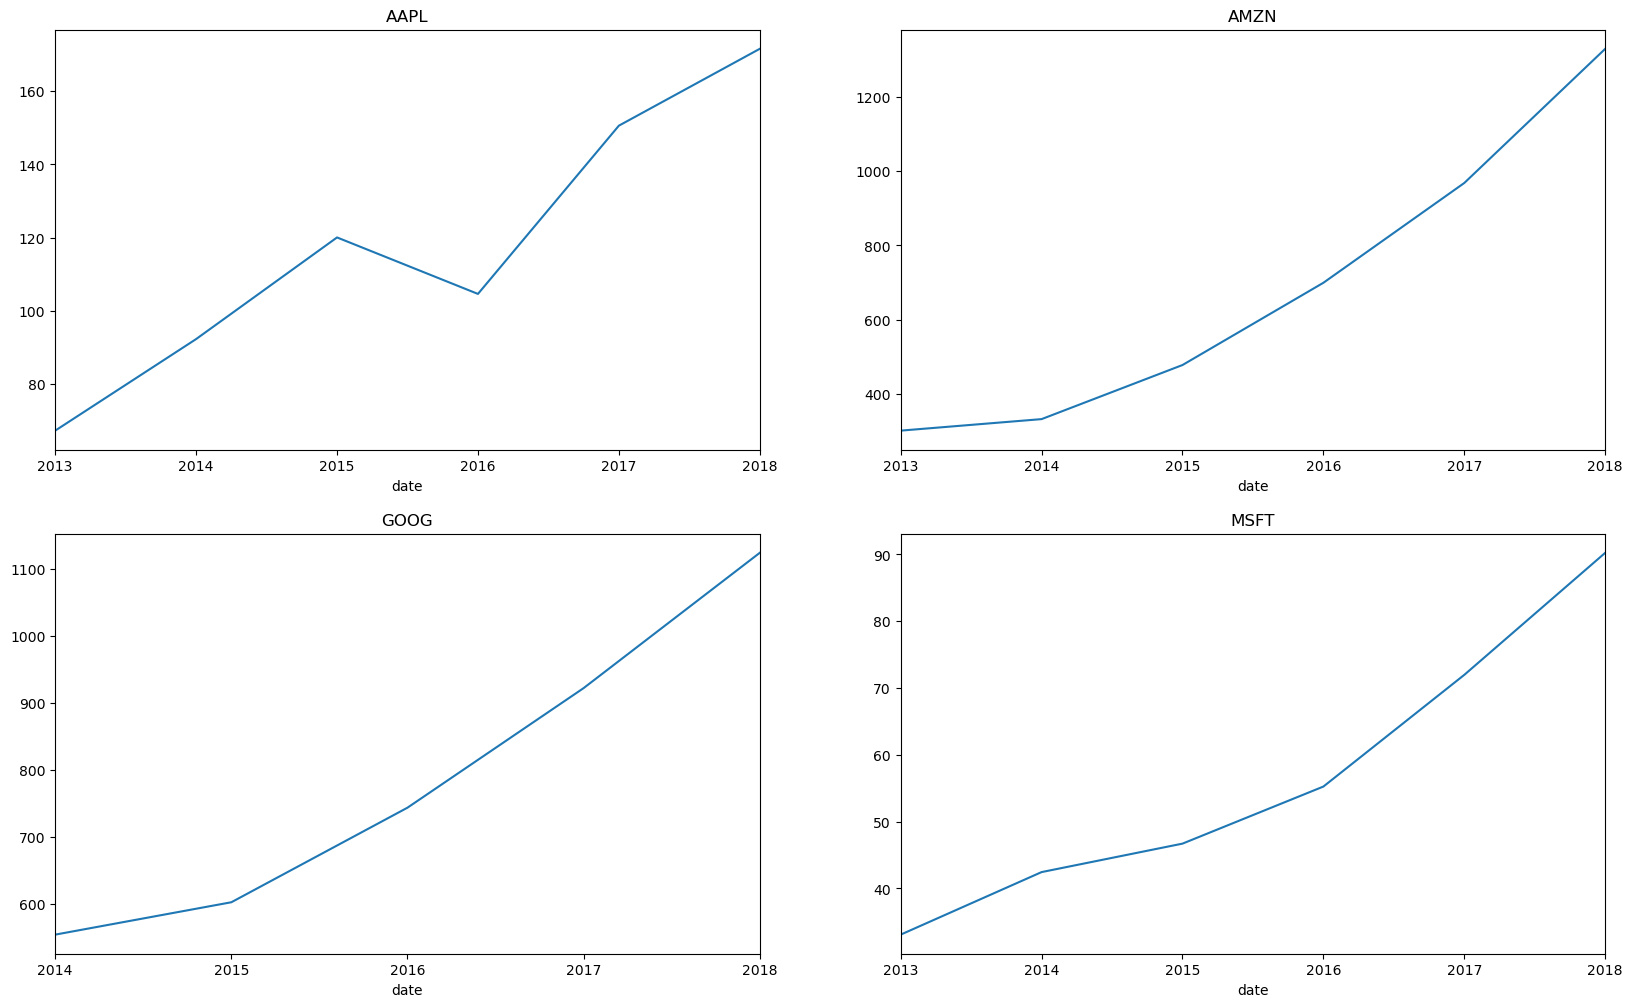

In [25]:
# Performing resampling analysis of closing price

#resample on yearly basis
plt.figure(figsize = (20,12))

for index, company in enumerate(company_name, 1):
    plt.subplot(2, 2, index)
    filter = new_data['Name'] == company
    df = new_data[filter]
    yearly = df['close'].resample('Y').mean()
    yearly.plot()
    plt.title(company)



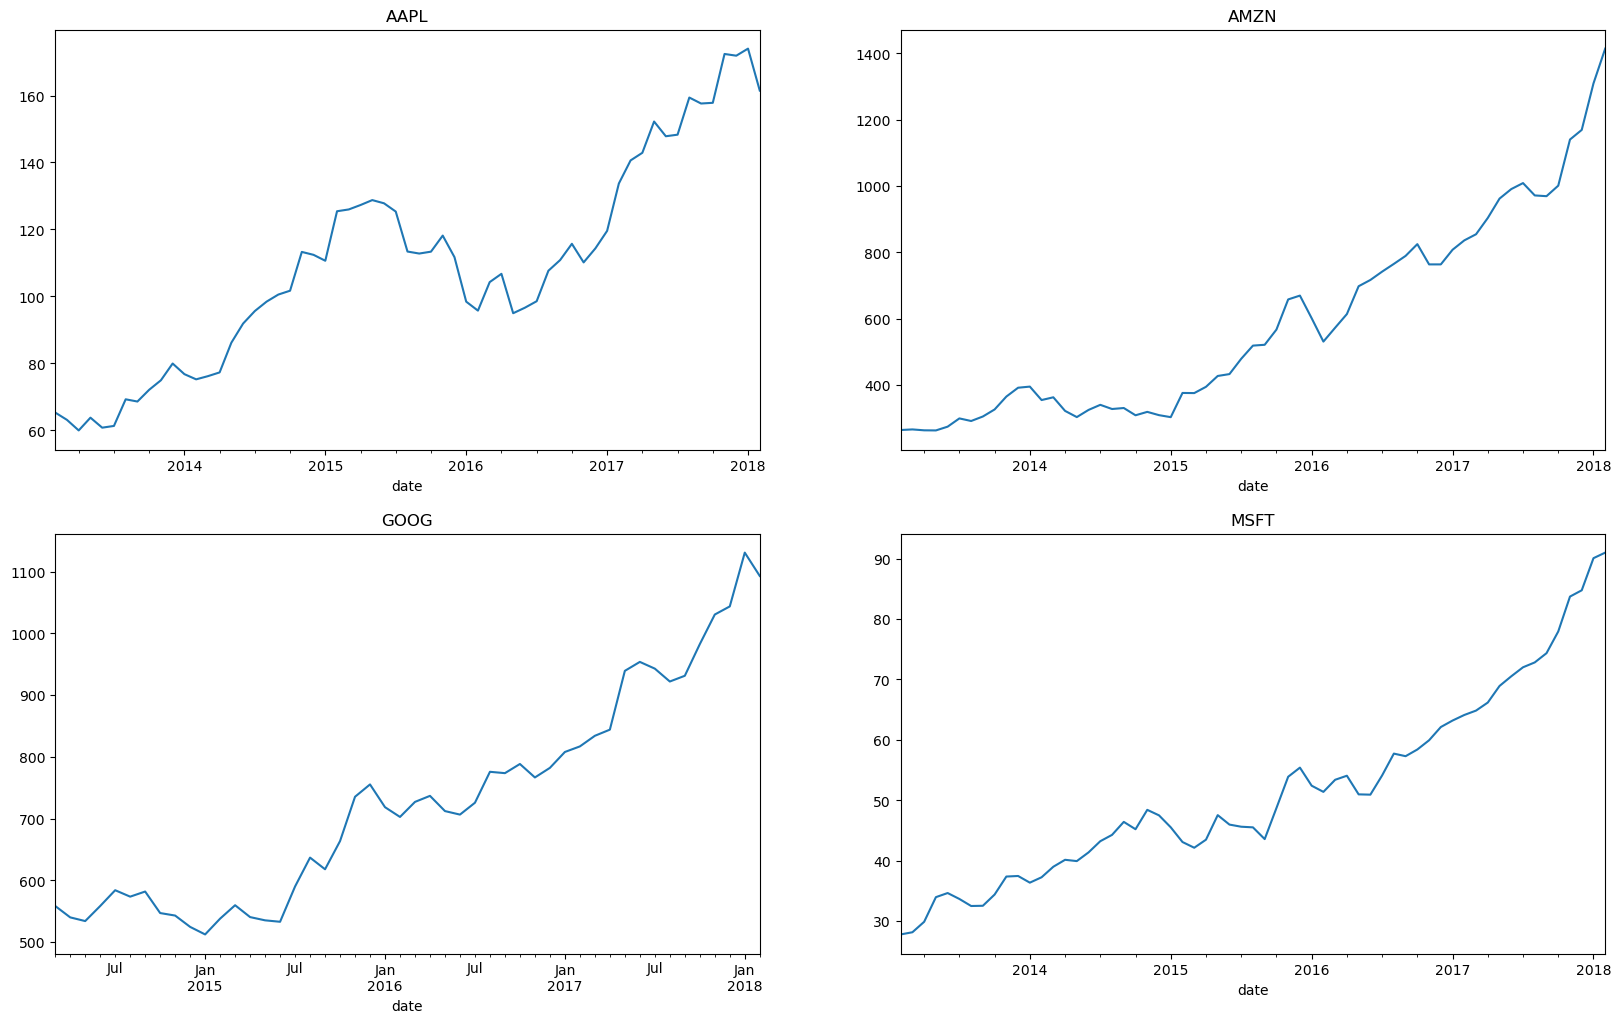

In [26]:
#resample on Monthly basis
plt.figure(figsize = (20,12))

for index, company in enumerate(company_name, 1):
    plt.subplot(2, 2, index)
    filter = new_data['Name'] == company
    df = new_data[filter]
    yearly = df['close'].resample('M').mean()
    yearly.plot()
    plt.title(company)


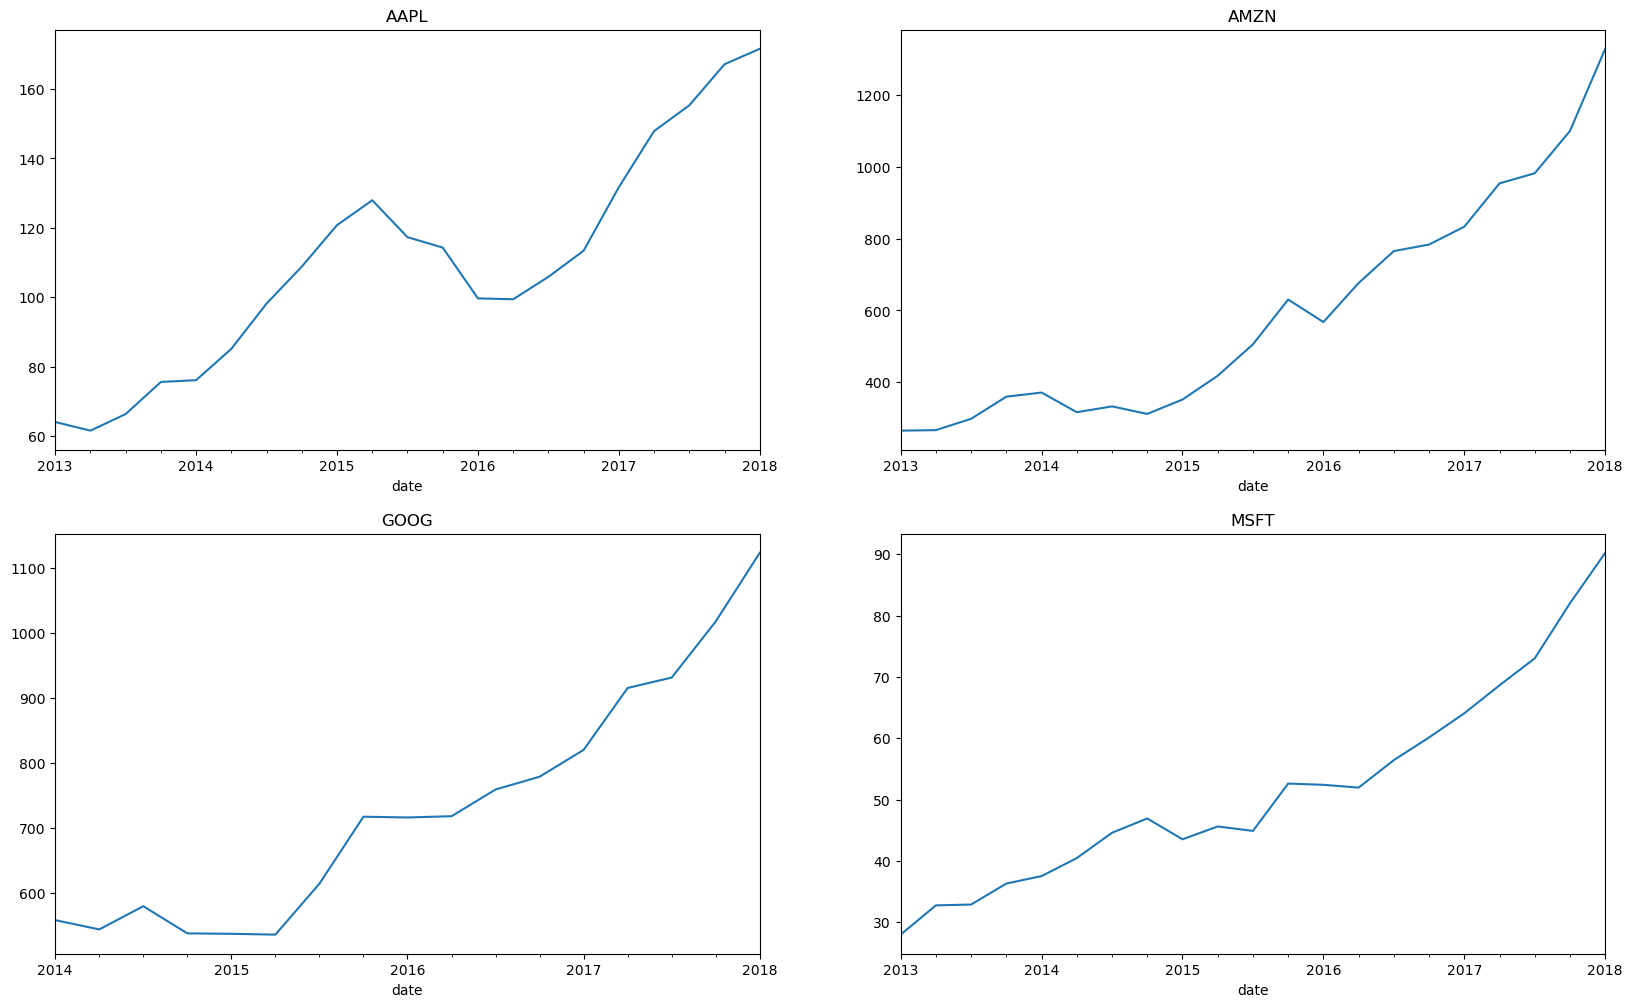

In [27]:
#resample on Quarterly basis
plt.figure(figsize = (20,12))

for index, company in enumerate(company_name, 1):
    plt.subplot(2, 2, index)
    filter = new_data['Name'] == company
    df = new_data[filter]
    yearly = df['close'].resample('Q').mean()
    yearly.plot()
    plt.title(company)


In [28]:
# Perform multi-variate analysis to understand co-relation
# Checking if the closing prices of this stocks are correlated or not

apple = pd.read_csv(company_list[0])
amazon = pd.read_csv(company_list[1])
google = pd.read_csv(company_list[2])
microsoft = pd.read_csv(company_list[3])

In [29]:
closing_price = pd.DataFrame()

closing_price['apple_close'] = apple['close']
closing_price['amazon_close'] = amazon['close']
closing_price['google_close'] = google['close']
closing_price['microsoft_close'] = microsoft['close']

In [30]:
closing_price

apple_close  amazon_close  google_close  microsoft_close
0         67.8542        261.95        558.46            27.55
1         68.5614        257.21        559.99            27.86
2         66.8428        258.70        556.97            27.88
3         66.7156        269.47        567.16            28.03
4         66.6556        269.24        567.00            28.04
...           ...           ...           ...              ...
1254     167.7800       1390.00           NaN            94.26
1255     160.5000       1429.95           NaN            91.78
1256     156.4900       1390.00           NaN            88.00
1257     163.0300       1442.84           NaN            91.33
1258     159.5400       1416.78           NaN            89.61

[1259 rows x 4 columns]

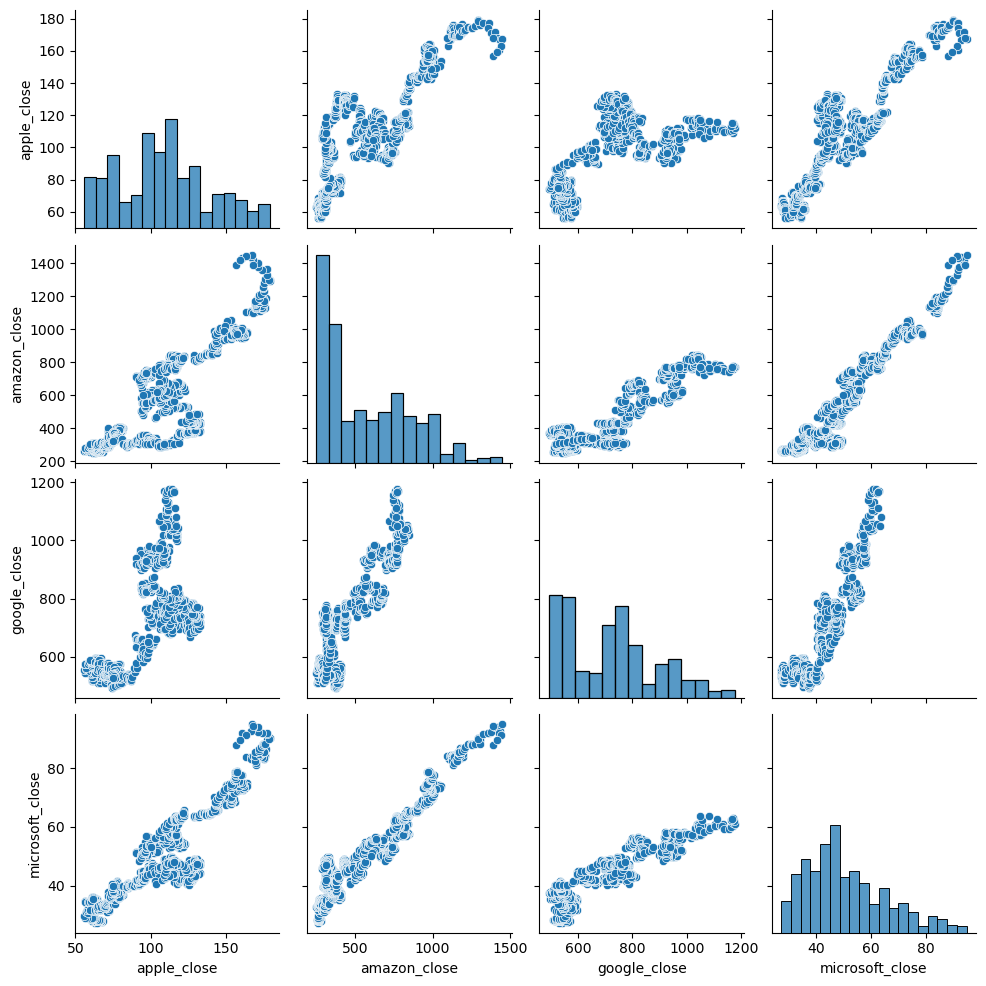

In [31]:
# Visualize their correlation using pairplot
sns.pairplot(closing_price)

In [32]:
# show their correlation using heatmap

correlation = closing_price.corr()
correlation

apple_close  amazon_close  google_close  microsoft_close
apple_close         1.000000      0.819078      0.640522         0.899689
amazon_close        0.819078      1.000000      0.888456         0.955977
google_close        0.640522      0.888456      1.000000         0.907011
microsoft_close     0.899689      0.955977      0.907011         1.000000

<Axes: >

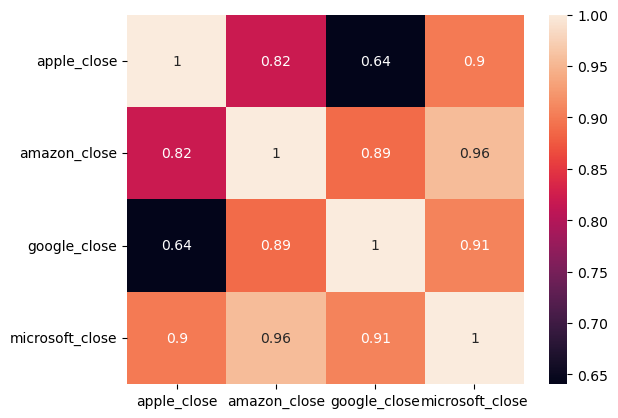

In [33]:
sns.heatmap(correlation, annot = True)

In [34]:
# Performing co-relation analysis
# checking when the daily change in closing price or daily return of stocks are correlated or not
closing_price           

apple_close  amazon_close  google_close  microsoft_close
0         67.8542        261.95        558.46            27.55
1         68.5614        257.21        559.99            27.86
2         66.8428        258.70        556.97            27.88
3         66.7156        269.47        567.16            28.03
4         66.6556        269.24        567.00            28.04
...           ...           ...           ...              ...
1254     167.7800       1390.00           NaN            94.26
1255     160.5000       1429.95           NaN            91.78
1256     156.4900       1390.00           NaN            88.00
1257     163.0300       1442.84           NaN            91.33
1258     159.5400       1416.78           NaN            89.61

[1259 rows x 4 columns]

In [35]:
closing_price.columns

Index(['apple_close', 'amazon_close', 'google_close', 'microsoft_close'], dtype='object')

In [36]:
closing_pct_change = closing_price[[
       'apple_close_pct_change', 
       'amazon_close_pct_change',
       'google_close_pct_change', 
       'microsoft_close_pct_change']]
closing_pct_change

KeyError: "None of [Index(['apple_close_pct_change', 'amazon_close_pct_change',\n       'google_close_pct_change', 'microsoft_close_pct_change'],\n      dtype='object')] are in the [columns]"

In [ ]:
# Visualising the co-reltion using pairgrid plot
g = sns.PairGrid(data = closing_pct_change)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [ ]:
# showing correlation_values
closing_pct_change.corr()